In [2]:
import random
import time
import matplotlib.pyplot as plt
import sys
import numpy as np
sys.setrecursionlimit(50000)

In [3]:
def quick_sort_lamuto(items, l, r):
    if l >= r:
        return
    m = l
    for i in range(l+1, r):
        if items[i] < items[l]:
            m += 1
            items[i], items[m] = items[m], items[i]
    items[l], items[m] = items[m], items[l]
    quick_sort_lamuto(items, l, m)
    quick_sort_lamuto(items, m+1, r)

In [12]:
def quick_sort_hoare(items, l, r):
    if l >= r:
        return
    t, i, j = items[l], l, r
    while True:
        while True:
            i += 1
            if not (i < r and items[i] < t):
                break
        while True:
            j -= 1
            if not (j > l and items[j] > t):
                break
        if i > j:
            break
        items[i], items[j] = items[j], items[i]
    items[l], items[j] = items[j], items[l]
    quick_sort_hoare(items, l, j)
    quick_sort_hoare(items, j+1, r)

In [5]:
def insertion_sort(items: [int], l, r):
    for i in range(l, r):
        j = i
        while j > l and items[j-1] > items[j]:
            items[j-1], items[j] = items[j], items[j-1]
            j -= 1

def quick_sort_bently(items, l, r):
    if r - l <= 10:
        insertion_sort(items, l, r)
        return
    ind = l + random.randint(0, r - l - 1)
    t, i, j = items[ind], l, r
    items[ind], items[l] = items[l], items[ind]
    while True:
        while True:
            i += 1
            if not (i < r and items[i] < t):
                break
        while True:
            j -= 1
            if not (j > l and items[j] > t):
                break
        if i > j:
            break
        items[i], items[j] = items[j], items[i]
    items[l], items[j] = items[j], items[l]
    quick_sort_bently(items, l, j)
    quick_sort_bently(items, j + 1, r)

In [6]:
def gen_arr(array_type: str, size: int) -> [int]:
    arr = [random.randint(0, 1000) for i in range(size)]
    if array_type == 'RANDOM':
        return arr
    if array_type == 'SORTED ASCENDING':
        return sorted(arr)
    if array_type == 'SORTED DESCENDING':
        return sorted(arr)[::-1]
    if array_type == 'EQUAL':
        x = random.randint(0, 5)
        return [x for i in range(size)]

In [7]:
amount_of_elements = [100, 500, 1000, 2000, 4000, 5000, 10000]

In [18]:
def measure_time(func) -> [tuple]:
    ans = []
    for cnt in amount_of_elements:
        arr1 = gen_arr('RANDOM', cnt)
        arr2 = gen_arr('SORTED ASCENDING', cnt)
        arr3 = gen_arr('SORTED DESCENDING', cnt)
        arr4 = gen_arr('EQUAL', cnt)
        start_time1 = time.time()
        func(arr1, 0, len(arr1))
        run_time1 = time.time() - start_time1
        start_time2 = time.time()
        func(arr2, 0, len(arr2))
        run_time2 = time.time() - start_time2
        start_time3 = time.time()
        func(arr3, 0, len(arr3))
        run_time3 = time.time() - start_time3
        start_time4 = time.time()
        func(arr4, 0, len(arr4))
        run_time4 = time.time() - start_time4
        ans.append((run_time1, run_time2, run_time3, run_time4))
    return ans

In [19]:
result = [
    measure_time(quick_sort_lamuto),
    measure_time(quick_sort_hoare),
    measure_time(quick_sort_bently)
]

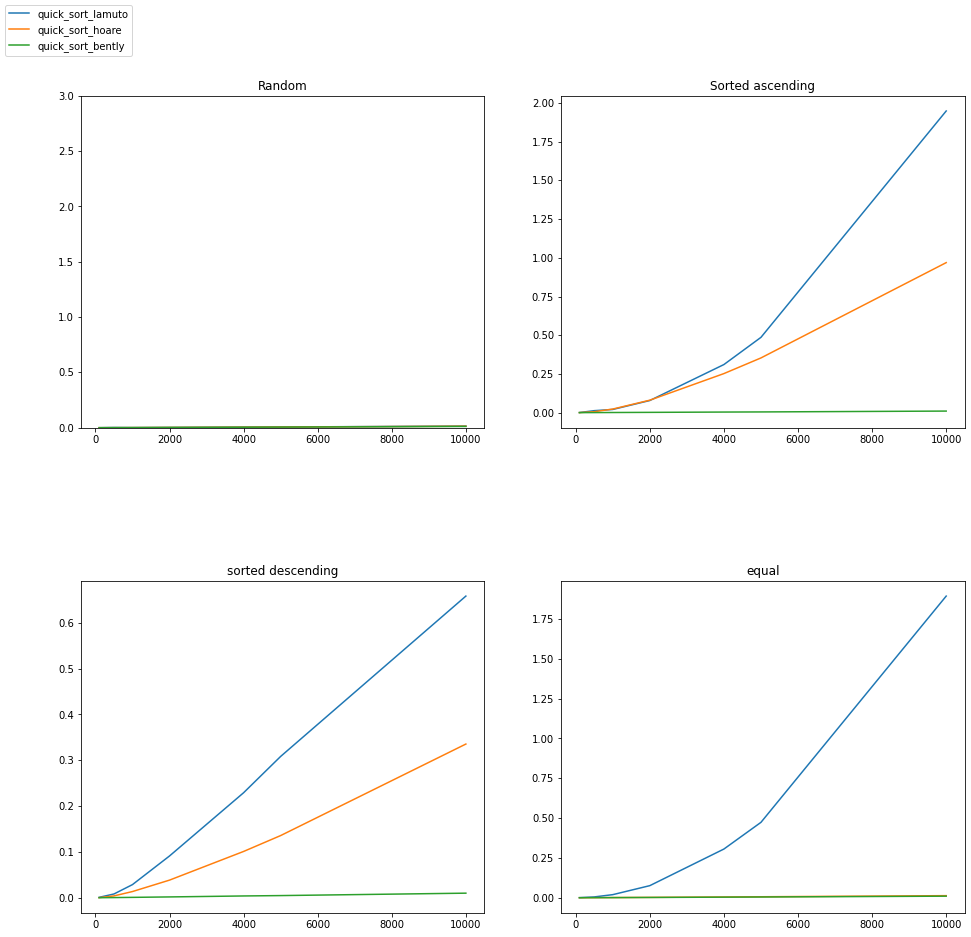

In [20]:
fig, axs = plt.subplots(2, 2)
t1, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[0]])
t2, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[1]])
t3, = axs[0, 0].plot(amount_of_elements, [row[0] for row in result[2]])
axs[0, 0].set_ylim(0, 3)
fig.legend([t1, t2, t3],['quick_sort_lamuto', 'quick_sort_hoare', 'quick_sort_bently'], loc="upper left")
axs[0, 0].set_title('Random')
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[0]])
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[1]])
axs[0, 1].plot(amount_of_elements, [row[1] for row in result[2]])
axs[0, 1].set_title('Sorted ascending')
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[0]])
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[1]])
axs[1, 0].plot(amount_of_elements, [row[2] for row in result[2]])
axs[1, 0].set_title('sorted descending')
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[0]])
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[1]])
axs[1, 1].plot(amount_of_elements, [row[3] for row in result[2]])
axs[1, 1].set_title('equal')
fig.tight_layout()
fig.set_figheight(14)
fig.set_figwidth(14)